<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 1s 1s/step
예측 결과: [('n02325366', 'wood_rabbit', 0.7427537), ('n02326432', 'hare', 0.24023704), ('n02328150', 'Angora', 0.008815734), ('n01877812', 'wallaby', 0.002689247), ('n02356798', 'fox_squirrel', 0.0012279289)]


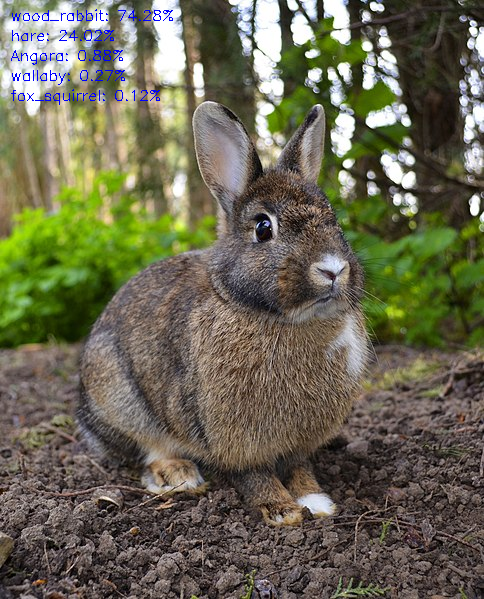

In [ ]:
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow

# ResNet50 모델을 불러옵니다.
model = ResNet50(weights='imagenet')

# 이미지를 읽어옵니다.
img = cv.imread("rabbit.jpg")
x = np.reshape(cv.resize(img, (224, 224)), (1, 224, 224, 3))
x = preprocess_input(x)

# 예측을 수행합니다.
preds = model.predict(x)
top5 = decode_predictions(preds, top=5)[0]
print('예측 결과:', top5)

# 예측 결과를 이미지에 표시합니다.
for i, (_, label, score) in enumerate(top5):
    label_text = '{}: {:.2f}%'.format(label, score * 100)
    cv.putText(img, label_text, (10, 20 + i * 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# 이미지를 코랩에서 표시합니다.
cv2_imshow(img)
